
<a id='chap-tpdbscan'></a>

# Practical Work - DBSCAN

Useful external references :

- [Documentation NumPy](https://docs.scipy.org/doc/numpy/user/index.html)  
- [Documentation SciPy](https://docs.scipy.org/doc/scipy/reference/)  
- [Documentation MatPlotLib](http://matplotlib.org/)  
- [Site scikit-learn](http://scikit-learn.org/stable/index.html)  
- [Site langage python](https://www.python.org)  

The goal of this practical session is to illustrate the implementation of clustering with DBSCAN. First, we will observe the behavior of the algorithm in a synthetic case that defeats $k$-means. We will see how to use classical heuristics to determine the parameters of the algorithm and how to interpret the resulting partitioning. Finally, we will apply DBSCAN to a real dataset and illustrate
its use for detecting outliers.

*Source*: Cnam

## Density-based clustering in Scikit-Learn

In this session, we focus on  Density-Based Spatial Clustering of Applications with Noise (**DBSCAN**).

Like $k$-means, DBSCAN allows us to assign each observation of the data (`matrix n_samples x n_features`) with a cluster. However, DBSCAN is a transductive method: the algorithm cannot produce classifications for new data (the model must be retrained to include the new observations).

The description of the DBSCAN implementation can be found in
[https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

## DBSCAN clustering with generated data

Let's start by generating a synthetic dataset that consists of 500 observations in a 2D space. We will use a function built into Scikit-Learn that allows us to produce circular scatter plots:
[make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html).

(500, 2)


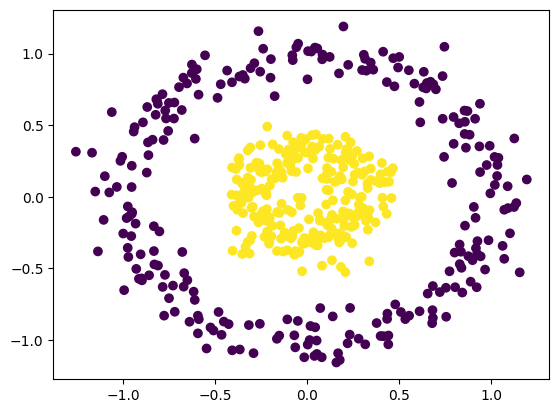

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
from sklearn.utils import shuffle

# Generate a point cloud composed of two circles
# The cloud contains 500 observations (`n_samples`) with added Gaussian noise
# of standard deviation 0.1 (`noise`).
# The ratio between the radius of the small circle and the large circle
# is 0.3 (`factor`).
data, labels = sklearn.datasets.make_circles(n_samples=500, noise=0.1, factor=0.3, random_state=0)

print(data.shape)
# Random permutation of the rows of the matrix (shuffle the observations)
# data, labels = shuffle(data, labels)

# Display the point cloud
fig = plt.figure()
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

In [29]:
data

array([[-6.97055394e-01,  7.65256513e-01],
       [ 1.04857325e-01,  4.89863741e-02],
       [ 2.54988945e-01,  2.30096144e-01],
       [ 2.51257772e-02, -2.84946159e-01],
       [ 2.06967320e-01, -5.26438045e-01],
       [ 1.12536772e+00,  4.07133885e-01],
       [-9.15962172e-02,  2.59744745e-01],
       [ 3.37982479e-01, -9.34959746e-02],
       [-8.59654203e-01, -5.47802095e-01],
       [-7.73496577e-01, -5.45038690e-01],
       [ 9.05321888e-01, -7.06330555e-02],
       [ 3.28634369e-01,  6.08843834e-02],
       [-3.83458282e-01,  1.06771632e-02],
       [ 2.36044501e-01,  3.79363393e-01],
       [-4.65715192e-01, -9.63343884e-01],
       [ 1.09519739e-01,  1.68570770e-01],
       [ 1.94501022e-01, -1.02403571e-01],
       [-2.53119507e-01,  2.02821470e-01],
       [-7.85886048e-01, -6.29006279e-01],
       [ 4.67252298e-01,  9.67380053e-01],
       [ 4.13962887e-01, -9.72844873e-01],
       [-2.25719754e-01,  2.12092495e-02],
       [ 8.35157314e-01, -3.83361638e-01],
       [-8.

## Question

How many groups does this dataset contain?

**Answer**

It contains 2, one inside and other outside.

## Question

Perform partitioning of this dataset using $k$-means. What can we expect? What do you observe?

Centroids:
 [[-0.39125486 -0.14063307]
 [ 0.40663124  0.13413374]]
Inertia: 195.80185237690853


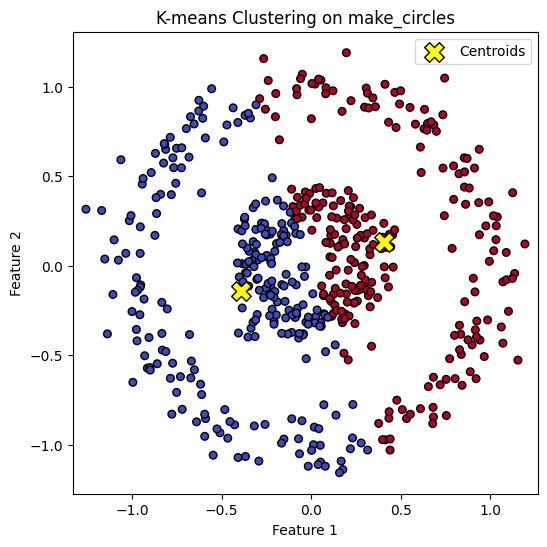

In [10]:
from sklearn.cluster import k_means

# Apply k-means
centroids, cluster_labels, inertia = k_means(data, n_clusters=2, random_state=0)

# Print results
print("Centroids:\n", centroids)
print("Inertia:", inertia)

# Visualize clusters
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='coolwarm', s=30, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow', marker='X', s=200, edgecolor='k', label='Centroids')
plt.title("K-means Clustering on make_circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis('equal')
plt.legend()
plt.show()

Since the two circles are separated by an area without data, a density-based method seems appropriate. We can create a clustering model using DBSCAN by importing it from Scikit-Learn:

In [11]:
from sklearn.cluster import DBSCAN

The arguments of the DBSCAN constructor are as follows:

- `eps`: the neighborhood dimension, i.e., the maximum distance   between two observations that allows them to be considered neighbors   of each other,
- `min_samples`: the minimum number of neighbors that a central point must have,  
- `metric`: the distance to be considered (by default, the Euclidean distance is used).  


The following methods can be called:
- `.fit(X)`: performs automatic fitting using the DBSCAN method on the observation matrix `X`. The results are stored in the `.labels_` attribute.
- `.fit_predict(X)`: identical to `.fit(X)` but returns the cluster labels directly.  


The following attributes are available after calling the `.fit()` method:
- `core_sample_indices_`: the indices of the central points.  
- `labels_`: the group numbers of the points in the observation matrix.  

## Question

What are the default values for the important parameters of DBSCAN in scikit-learn ($\varepsilon$ and $minPts$)?

Let us apply clustering using DBSCAN to our dataset. As with $k$-means, this step can be performed in two stages by calling `fit()` and then accessing the `labels_` attribute, or it can be done in a single operation using the `fit_predict()` method:

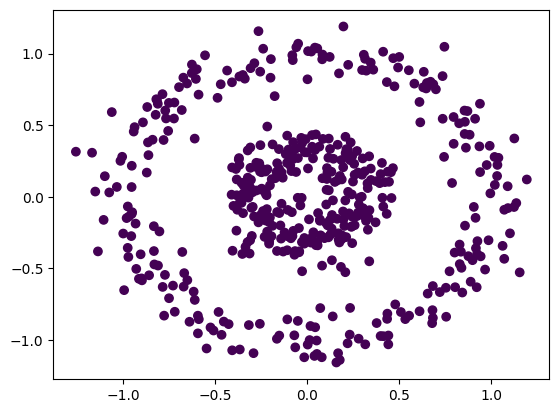

In [12]:
db = DBSCAN(eps=0.5, min_samples=5)
predictions = db.fit_predict(data)
# equivalent to
# db.fit(data)
# predictions = db.labels_

# Display the point cloud coloured by predictions
fig = plt.figure()
plt.scatter(data[:,0], data[:,1], c=predictions)
plt.show()

The default values for $\varepsilon$ is 0.5 and $minPts$ is 5

## Question

What do you observe ? Which parameter is likely to need adjusting to improve this result?

To refine our analysis, we will apply Schubert's heuristic, which uses the graph of $k$-distances in the observation cloud.
For now, we will assume that `min_samples` is set to its default value, i.e., 5. We must therefore plot the graph of 4-distances for our observation matrix.

In [13]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=4).fit(data)
distances, _ = nn.kneighbors(data)

In [14]:
distances 

array([[0.        , 0.05057477, 0.07049454, 0.10226564],
       [0.        , 0.0128394 , 0.0707787 , 0.07545459],
       [0.        , 0.03363039, 0.05468455, 0.05973311],
       ...,
       [0.        , 0.08811632, 0.23240509, 0.25047591],
       [0.        , 0.02324804, 0.03859349, 0.0613093 ],
       [0.        , 0.0419019 , 0.07886621, 0.14241709]], shape=(500, 4))

We need to adjust the distance between the groups $\varepsilon$

## Question

Using the [NearestNeighbors documentation in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors.kneighbors), explain what the code above does.

We can now plot the 4-distance graph. To do this, we only keep the distance of each point to its fourth neighbor, then sort this list in descending order.

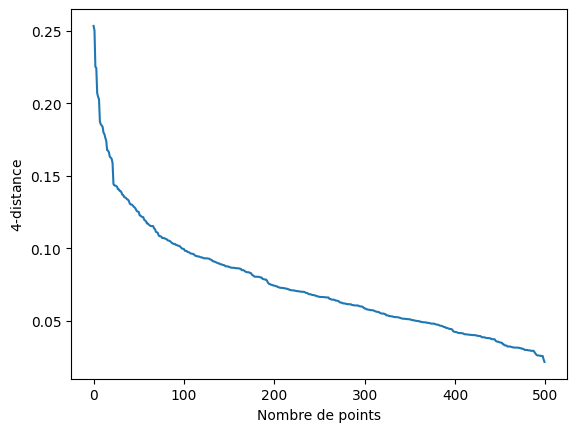

In [15]:
distances_triees = np.sort(distances[:,-1])[::-1]
fig = plt.figure()
plt.plot(distances_triees)
plt.xlabel("Nombre de points")
plt.ylabel("$4$-distance")
plt.show()

## Question

From the 4-distance graph, determine the appropriate value of `eps` for this dataset using the heuristic seen in the course. Apply DBSCAN again with these parameters. Display the resulting point cloud.

the distance is determited takiing into account the elbow rule, so it is 0.2

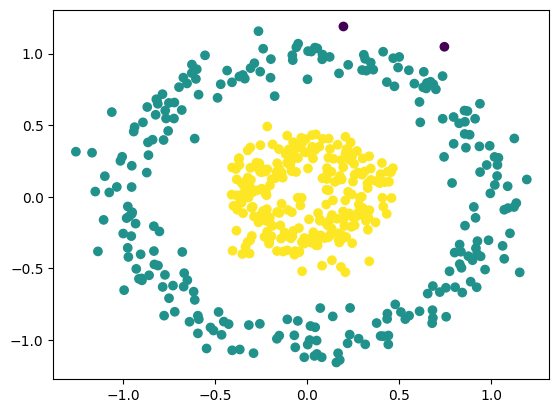

In [16]:
db_2 = DBSCAN(eps=0.2, min_samples=5)
predictions = db_2.fit_predict(data)

# Display the point cloud coloured by predictions
fig = plt.figure()
plt.scatter(data[:,0], data[:,1], c=predictions)
plt.show()

## Question

How many groups do you get? What do the label observations `-1` correspond to?

In [17]:
without_group = predictions[predictions==-1]
len(without_group)


2

## Classification with DBSCAN on the Iris dataset

The Iris dataset is a classic in statistical learning. It contains 150 observations of plants according to four attributes:
- length of the [sepal](https://fr.wikipedia.org/wiki/S%C3%A9pale),
- width of the sepal,  
- petal length,  
- petal width.  

The observations belong to one of three classes, corresponding to the three species of iris: *Setosa*, *Versicolour*, or *Virginica*.

More details can be found in the [documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset).

Iris is integrated into scikit-learn and is available from the submodule `sklearn.datasets`:

In [58]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

In [59]:
X.shape
#y.shape

(150, 4)

## Question

How many observations does this dataset contain? 150 observations and 4 features

In order to simulate the presence of outliers, we will randomly generate 20 noisy points, drawn according to a uniform distribution between the minimum and maximum values of each column of the observation matrix:

In [60]:
import numpy as np
min_, max_ = X.min(axis=0), X.max(axis=0)
noise = np.random.rand(20, 4) * (max_ - min_) + min_
X = np.concatenate((X, noise))
y = np.concatenate((y, -1 * np.ones(20, dtype=int)))

In [61]:
X

array([[5.1       , 3.5       , 1.4       , 0.2       ],
       [4.9       , 3.        , 1.4       , 0.2       ],
       [4.7       , 3.2       , 1.3       , 0.2       ],
       [4.6       , 3.1       , 1.5       , 0.2       ],
       [5.        , 3.6       , 1.4       , 0.2       ],
       [5.4       , 3.9       , 1.7       , 0.4       ],
       [4.6       , 3.4       , 1.4       , 0.3       ],
       [5.        , 3.4       , 1.5       , 0.2       ],
       [4.4       , 2.9       , 1.4       , 0.2       ],
       [4.9       , 3.1       , 1.5       , 0.1       ],
       [5.4       , 3.7       , 1.5       , 0.2       ],
       [4.8       , 3.4       , 1.6       , 0.2       ],
       [4.8       , 3.        , 1.4       , 0.1       ],
       [4.3       , 3.        , 1.1       , 0.1       ],
       [5.8       , 4.        , 1.2       , 0.2       ],
       [5.7       , 4.4       , 1.5       , 0.4       ],
       [5.4       , 3.9       , 1.3       , 0.4       ],
       [5.1       , 3.5       ,

In [62]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

## Question

Perform a principal component analysis and visualize the Iris dataset projected along its first two principal axes.

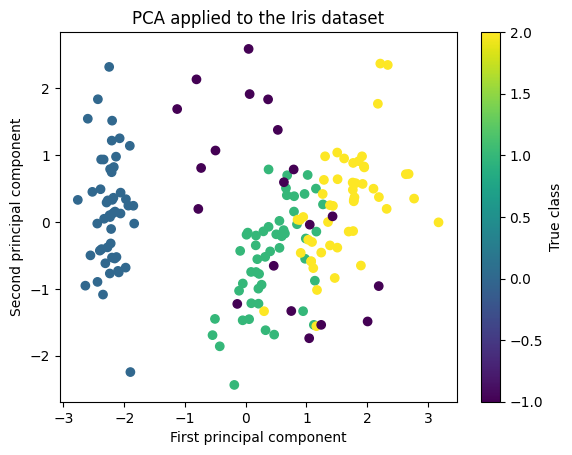

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y) #the color of each point is determined by its class label y
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA applied to the Iris dataset')
plt.colorbar(label='True class')
plt.show()


blue points represent Setosa (class 0), green ones represent Versicolor (class 1) and yellow ones represent Virginica(class 2) y -1 are noisy points.

## Question

Apply clustering using DBSCAN (work on the 4-dimensional data, not the projected data!). Visualize the groups obtained in the main plane of the ACP (2 first components). Compare this result with the partitioning obtained using $k$-means.

The points corresponding to label -1 are those identified as outliers. If the value of $ \varepsilon $ has been chosen correctly, the noisy observations injected into the dataset should have been isolated by DBSCAN.

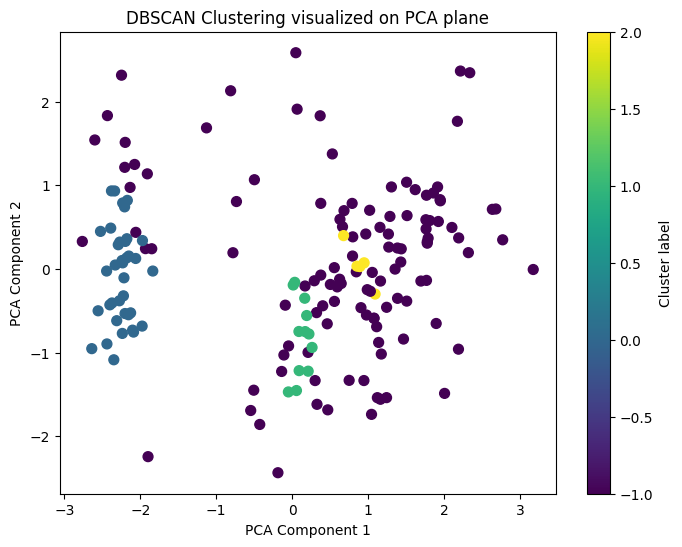

In [74]:
# Fit DBSCAN on the original 4D data
dbscan = DBSCAN(eps=0.3, min_samples=5) # After multiple attemps, 0.3 was the only value wich shows just 3 clusters
db_labels = dbscan.fit_predict(X)  # X is the original 4D dataset

# Plot the DBSCAN clustering result
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=db_labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering visualized on PCA plane")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster label")
plt.show()


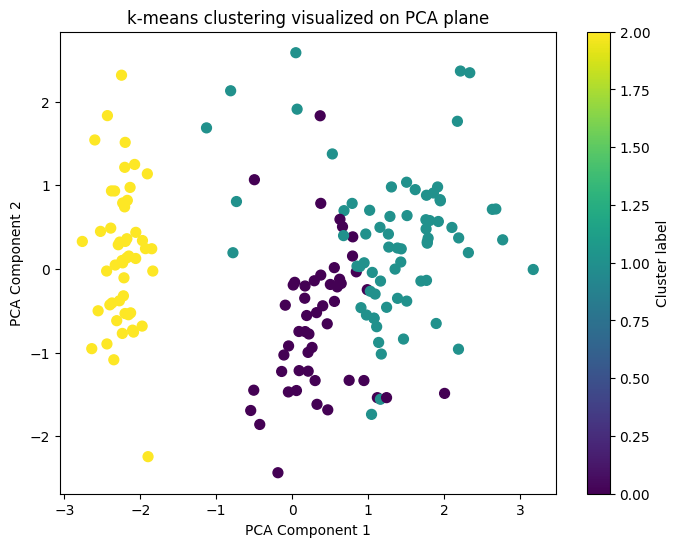

In [78]:
from sklearn.cluster import KMeans

# Assuming you already have k-means labels from before
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# Plot the k-means clustering result
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("k-means clustering visualized on PCA plane")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster label")
plt.show()


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

axs[0].scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis', s=50)
axs[0].set_title("K-Means Clustering (PCA plane)")
axs[0].set_xlabel("PCA Component 1")
axs[0].set_ylabel("PCA Component 2")

axs[1].scatter(X_pca[:,0], X_pca[:,1], c=db_labels, cmap='viridis', s=50)
axs[1].set_title("DBSCAN Clustering (PCA plane)")
axs[1].set_xlabel("PCA Component 1")
axs[1].set_ylabel("PCA Component 2")

plt.show()

The DBSCAN classified too many point as noise, the only value which gives 3 groups was $ \varepsilon $ = 0.3. k-means does not classify points as noise.

## Question

Using the functions in `sklearn.metrics`, calculate the rate of correct detection of outliers. Up to what proportion of noisy data is the partitioning obtained by DBSCAN robust?

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Create a binary version (outlier = 1, inlier = 0)
true_outliers = (y == -1).astype(int)
pred_outliers = (db_labels == -1).astype(int)

# Calculate the rate of correct detection (accuracy)
correct_detection_rate = accuracy_score(true_outliers, pred_outliers)

print("Rate of correct detection of outliers:", round(correct_detection_rate, 2))

Rate of correct detection of outliers: 0.44


It means that DBSCAN is correctly detecting, 44% of the outliers correctly.